In [1]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.loaders import load_data_partition

In [ ]:
data_partition_path = "INSERT YOUR DATA PARTITION PATH HERE"

In [2]:
data = load_data_partition(data_partition_path)

In [3]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

# LightGBM

In [5]:
best_params = {'learning_rate': 0.1, 'random_state': 500, 'reg_alpha': 1, 'reg_lambda': 1.2}
lgbm = LightGBMClassifier(**best_params)
lgbm.fit(X_train, y_train)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 25, number of used features: 0
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -2.120264
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

/Users/nathanfernandes/Documents/track_classifier/inda_mir/modeling/evaluation/__init__.py:89: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


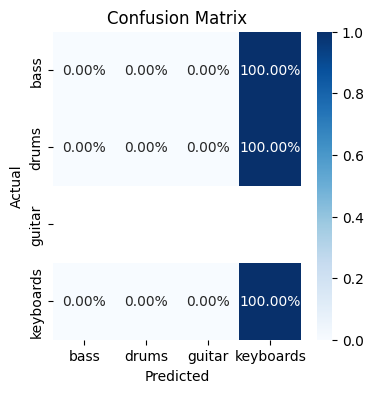

In [6]:
plot_confusion_matrix(y_test, lgbm.predict(X_test), data.labels)

In [7]:
print_classification_report(y_test, lgbm.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.95      0.95      0.95       520
       drums       0.92      0.83      0.87       376
      guitar       0.68      0.84      0.75       388
   keyboards       0.76      0.75      0.75       366
      vocals       0.86      0.69      0.77       218

    accuracy                           0.83      1868
   macro avg       0.84      0.81      0.82      1868
weighted avg       0.84      0.83      0.83      1868



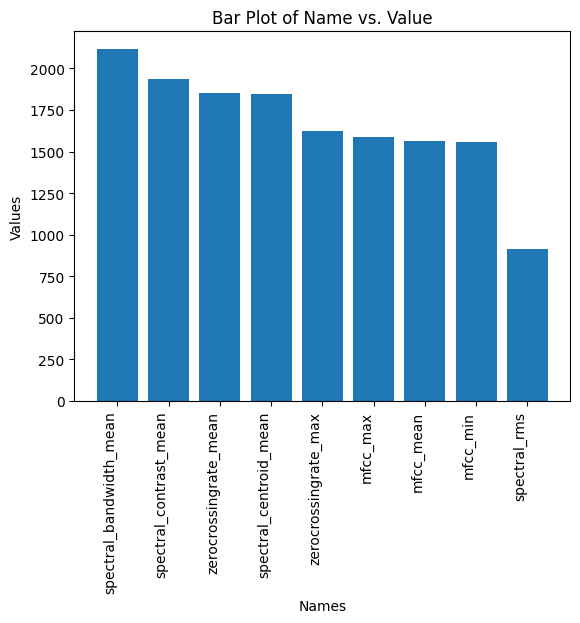

In [8]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))

In [8]:
lgbm.save_model('../models/', 'lgbm_v1')